# Problema: Dataset de pingüinos:

Carga el sigiuente dataset y responde las siguientes preguntas:

```python
import pandas as pd
import seaborn as sns

# Cargar el dataset
df = sns.load_dataset('penguins')
```

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

df = sns.load_dataset('penguins')

In [2]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


1. ¿Cuántas especies diferentes de pingüinos hay en el dataset?

In [3]:
Especies = len(df.species.value_counts())
print("El número de especies es {}.".format(Especies))

El número de especies es 3.


2. ¿Cuál es la longitud media del pico de los pingüinos de la especie Adelie?

In [4]:
df2 = df[~(df["bill_length_mm"].isna())]   #Filtro para los NaN.

Media_picos = df2[df2.species=='Adelie'].bill_length_mm.mean()
print("El tamaño promedio del pico de la especie Adelie es {} mm.".format(Media_picos))

El tamaño promedio del pico de la especie Adelie es 38.79139072847682 mm.


3. ¿Cuál es la masa corporal promedio de los pingüinos de la especie Gentoo?

In [5]:
df3 = df[~(df["body_mass_g"].isna())]   #Filtro los datos.

Media_masa = df3[df3.species=="Gentoo"].body_mass_g.mean()
print("La masa corporal promedio de los pingüinos de la especie Gentoo es {} g.".format(Media_masa))

La masa corporal promedio de los pingüinos de la especie Gentoo es 5076.016260162602 g.


4. ¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos?

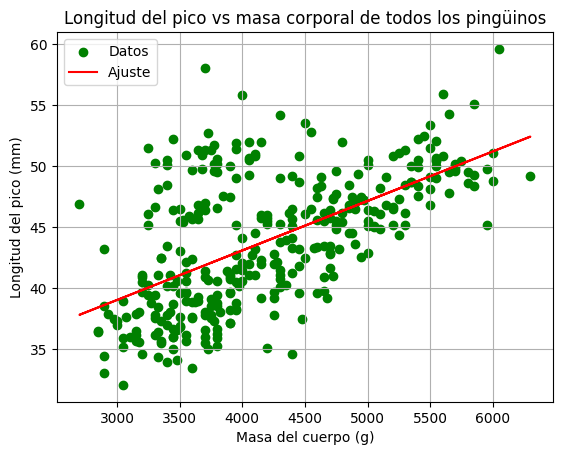

In [6]:
y4 = df["bill_length_mm"][~(df["bill_length_mm"].isna())]   #Con esto se filtran los NaN para poder hacer la regresión lineal.
x4 = df["body_mass_g"][~(df["body_mass_g"].isna())]

f = lambda x,A,B:A*x+B 
C_F4 = curve_fit(f,x4,y4)

plt.scatter(x4,y4,color='g',label='Datos')
plt.plot(x4,C_F4[0][0]*np.array(x4)+C_F4[0][1],color='r',label='Ajuste')
plt.title("Longitud del pico vs masa corporal de todos los pingüinos")
plt.ylabel("Longitud del pico (mm)")
plt.xlabel("Masa del cuerpo (g)")
plt.grid()
plt.legend()
plt.show()

Viendo la figura, se podría decir que los datos se relacionan de una manera aproximadamente lineal.

5. ¿Cuál es la isla con mayor número de pingüinos en el dataset?

In [7]:
Isla_max = df.island.value_counts()[df.island.value_counts()==df.island.value_counts().max()].index[0]

print("La isla con mayor número de pingüinos es {}.".format(Isla_max))

La isla con mayor número de pingüinos es Biscoe.


6. ¿Cuál es la desviación estándar de la longitud de la aleta de los pingüinos de la especie Chinstrap?

In [8]:
df6 = df[~(df["flipper_length_mm"].isna())]   #Filtrado de datos.

Std_aleta_Chinstrap = df6[df6.species=="Chinstrap"].flipper_length_mm.std()

print("La desviación estándar de la longitud de la aleta de los pingüinos de la especie Chinstrap es {} mm.".format(Std_aleta_Chinstrap))

La desviación estándar de la longitud de la aleta de los pingüinos de la especie Chinstrap es 7.131894258578147 mm.


7. ¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?

In [9]:
Penguin_max = df.loc[df.bill_length_mm[df.bill_length_mm==df.bill_length_mm.max()].index[0]]

print("Las características del pingüino en cuestión son las siguientes: \n\n{}".format(Penguin_max))
print("\n\nLa especie del pingüino en cuestión es: {}.".format(Penguin_max.species))

Las características del pingüino en cuestión son las siguientes: 

species              Gentoo
island               Biscoe
bill_length_mm         59.6
bill_depth_mm          17.0
flipper_length_mm     230.0
body_mass_g          6050.0
sex                    Male
Name: 253, dtype: object


La especie del pingüino en cuestión es: Gentoo.


8. ¿Cuál es la proporción de machos y hembras en la especie Adelie?

In [10]:
Machos = df[df.species=="Adelie"].sex.value_counts().loc["Male"]
Hembras = df[df.species=="Adelie"].sex.value_counts().loc["Female"]

print("La proporción de machos y hembras en la especie Adelie es de {}.".format((Machos/Hembras)))

La proporción de machos y hembras en la especie Adelie es de 1.0.


9. ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?

In [11]:
df9a = df[~(df["body_mass_g"].isna())] 
df9 = df9a[~(df9a["bill_length_mm"].isna())]   #Filtro.

corr9= df9.loc[:,["bill_length_mm","body_mass_g"]].corr().iloc[0,1]
corr9_Adelie = df9[df9["species"]=="Adelie"].loc[:,["bill_length_mm","body_mass_g"]].corr().iloc[0,1]
corr9_Gentoo = df9[df9["species"]=="Gentoo"].loc[:,["bill_length_mm","body_mass_g"]].corr().iloc[0,1]
corr9_Chinstrap = df9[df9["species"]=="Chinstrap"].loc[:,["bill_length_mm","body_mass_g"]].corr().iloc[0,1]


print("La correlación entre la longitud del pico y la masa corporal de todos los pingüinos es {}. No es muy significativa.".format(corr9))
print("La correlación entre la longitud del pico y la masa corporal de todos los pingüinos Adelie es {}. No es muy significativa.".format(corr9_Adelie))
print("La correlación entre la longitud del pico y la masa corporal de todos los pingüinos Gentoo es {}. No es muy significativa.".format(corr9_Gentoo))
print("La correlación entre la longitud del pico y la masa corporal de todos los pingüinos Chinstrap es {}. No es muy significativa.".format(corr9_Chinstrap))

La correlación entre la longitud del pico y la masa corporal de todos los pingüinos es 0.5951098244376295. No es muy significativa.
La correlación entre la longitud del pico y la masa corporal de todos los pingüinos Adelie es 0.54886580645332. No es muy significativa.
La correlación entre la longitud del pico y la masa corporal de todos los pingüinos Gentoo es 0.6691661646930205. No es muy significativa.
La correlación entre la longitud del pico y la masa corporal de todos los pingüinos Chinstrap es 0.5136383479489104. No es muy significativa.


10. ¿Cuál es la distribución de la masa corporal entre las especies de pingüinos?

In [12]:
df10 = df[~(df["body_mass_g"].isna())] #Filtro.

Adelie_10 = df10["body_mass_g"][df10["species"]=="Adelie"]  
Gentoo_10 = df10["body_mass_g"][df10["species"]=="Gentoo"]
Chinstrap_10 = df10["body_mass_g"][df10["species"]=="Chinstrap"]

Dict_10 = {"Adelie":Adelie_10,"Gentoo":Gentoo_10,"Chinstrap":Chinstrap_10}

La masa corporal de las diferentes especies de pingüinos se distribuyen de la siguiente manera:

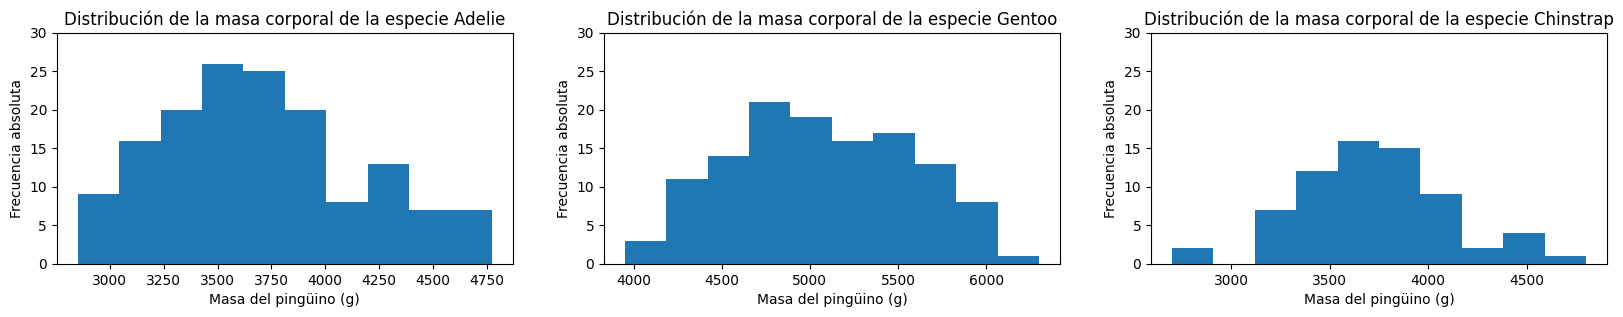

In [13]:
fig, ax = plt.subplots(ncols=3,figsize = (20,3))

for i in range(3):

    ax[i].hist(Dict_10[list(Dict_10.keys())[i]])
    ax[i].set_title("Distribución de la masa corporal de la especie "+list(Dict_10.keys())[i]) 
    ax[i].set_ylim(0,30)
    ax[i].set_ylabel("Frecuencia absoluta")    
    ax[i].set_xlabel("Masa del pingüino (g)")

11. ¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?

In [14]:
df11 = df[~(df["flipper_length_mm"].isna())] #Dataframe filtrado
Total_11 = df11.flipper_length_mm
Adelie_11 = df11[df11['species']=='Adelie'].flipper_length_mm
Gentoo_11 = df11[df11['species']=='Gentoo'].flipper_length_mm
Chinstrap_11 = df11[df11['species']=='Chinstrap'].flipper_length_mm

Dict_11 = {'Total':Total_11,'Adelie':Adelie_11,'Gentoo':Gentoo_11,'Chinstrap':Chinstrap_11}

for i in range(4):

    print("La longitud máxima de la aleta en {} es {} mm.".format( list(Dict_11.keys())[i] , Dict_11[list(Dict_11.keys())[i]].max()  ))
    print("La longitud máxima de la aleta en {} es {} mm.\n".format( list(Dict_11.keys())[i] , Dict_11[list(Dict_11.keys())[i]].min()  ))

La longitud máxima de la aleta en Total es 231.0 mm.
La longitud máxima de la aleta en Total es 172.0 mm.

La longitud máxima de la aleta en Adelie es 210.0 mm.
La longitud máxima de la aleta en Adelie es 172.0 mm.

La longitud máxima de la aleta en Gentoo es 231.0 mm.
La longitud máxima de la aleta en Gentoo es 203.0 mm.

La longitud máxima de la aleta en Chinstrap es 212.0 mm.
La longitud máxima de la aleta en Chinstrap es 178.0 mm.



12. ¿Cuántos pingüinos tienen una masa corporal superior a 5000 gramos?

In [15]:
print("El número de pingüinos con una masa corporal superior a 5000 gramos es {}.".format(df[df["body_mass_g"]>5000].shape[0]))

El número de pingüinos con una masa corporal superior a 5000 gramos es 61.


13. ¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?

In [16]:
df13 = df[~(df["bill_length_mm"].isna())]  #Filtrado

Especies_13 = ['Adelie','Gentoo','Chinstrap']
Islas_13 = ['Biscoe','Dream','Torgersen']

for i in Especies_13:
    for j in Islas_13:
        print('Número de pingüinos de la especie {} en la isla {}: {}'.format(i,j,df13[(df13["species"]==i) & (df13["island"]==j)].shape[0]))


Número de pingüinos de la especie Adelie en la isla Biscoe: 44
Número de pingüinos de la especie Adelie en la isla Dream: 56
Número de pingüinos de la especie Adelie en la isla Torgersen: 51
Número de pingüinos de la especie Gentoo en la isla Biscoe: 123
Número de pingüinos de la especie Gentoo en la isla Dream: 0
Número de pingüinos de la especie Gentoo en la isla Torgersen: 0
Número de pingüinos de la especie Chinstrap en la isla Biscoe: 0
Número de pingüinos de la especie Chinstrap en la isla Dream: 68
Número de pingüinos de la especie Chinstrap en la isla Torgersen: 0


Como se puede ver en la celda anterior, no todas las especies de pingüinos habitan todas las islas.

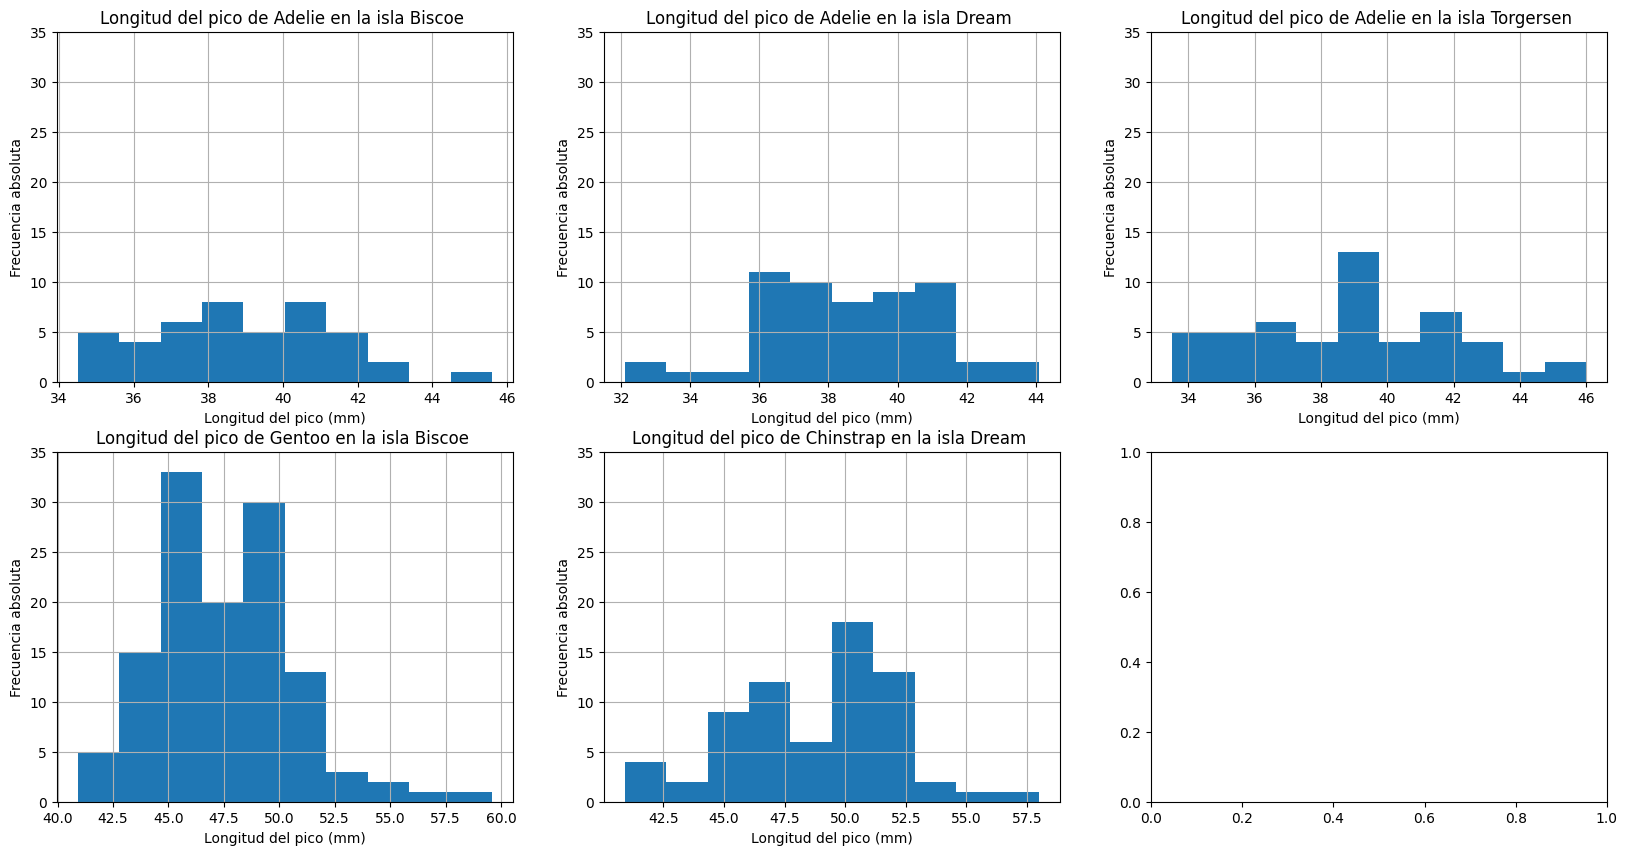

In [31]:
fig, ax = plt.subplots(ncols=3, nrows=2,figsize = (20,10))

for j in range(3):

    ax[0,j].hist(  df13[(df13["species"]==Especies_13[0]) & (df13["island"]==Islas_13[j])].bill_length_mm   )
    ax[0,j].set_title("Longitud del pico de {} en la isla {} ".format(Especies_13[0],Islas_13[j])) 
    ax[0,j].set_ylim(0,35)
    ax[0,j].set_ylabel("Frecuencia absoluta")    
    ax[0,j].set_xlabel("Longitud del pico (mm)")
    ax[0,j].grid()

ax[1,0].hist(  df13[(df13["species"]==Especies_13[1]) & (df13["island"]==Islas_13[0])].bill_length_mm   )
ax[1,0].set_title("Longitud del pico de {} en la isla {} ".format(Especies_13[1],Islas_13[0])) 
ax[1,0].set_ylim(0,35)
ax[1,0].set_ylabel("Frecuencia absoluta")    
ax[1,0].set_xlabel("Longitud del pico (mm)")
ax[1,0].grid()

ax[1,1].hist(  df13[(df13["species"]==Especies_13[2]) & (df13["island"]==Islas_13[1])].bill_length_mm   )
ax[1,1].set_title("Longitud del pico de {} en la isla {} ".format(Especies_13[2],Islas_13[1])) 
ax[1,1].set_ylim(0,35)
ax[1,1].set_ylabel("Frecuencia absoluta")    
ax[1,1].set_xlabel("Longitud del pico (mm)")
ax[1,1].grid()

Lanzar algunas conclusiones a partir de tan pocos datos puede ser apresurado; no obstante, con la información actual se puede ver que la media de la longitud del pico de la especie Adelie en las diferentes islas es prácticamente la misma, y el rango de valores entre los que oscila dicha longitud es similar para cada caso. Dado que solo hay datos de la especie Gentoo en la isla Biscoe, y solo hay información de la especie Chinstrap en la isla Dream, es probable que tales especies no habiten en las islas donde no hay datos sobre ellas. En general el comportamiento de los histogramas sugiere que la distribución del tamaño de los picos de cada especie es gaussiana.

14. ¿Cuál es la relación entre la longitud de la aleta y la masa corporal en los pingüinos de la especie Gentoo?

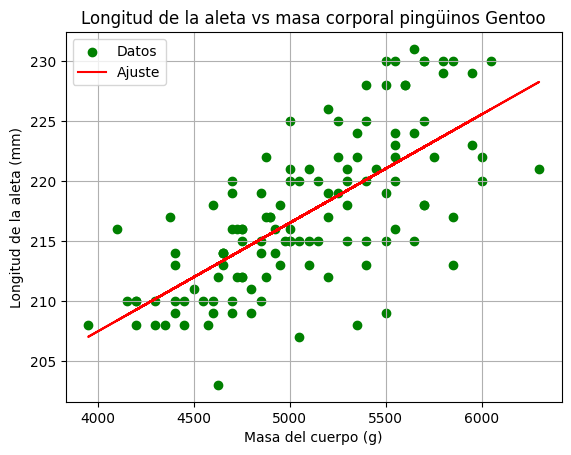

In [30]:
df14a = df[~(df["body_mass_g"].isna())]   #Filtro.
df14 = df14a[~(df14a["flipper_length_mm"].isna())]   #Filtro.


y14 = df14[df14['species']=='Gentoo'].flipper_length_mm  
x14 = df14[df14['species']=='Gentoo'].body_mass_g

f = lambda x,A,B:A*x+B 
C_F14 = curve_fit(f,x14,y14)

plt.scatter(x14,y14,color='g',label='Datos')
plt.plot(x14,C_F14[0][0]*np.array(x14)+C_F14[0][1],color='r',label='Ajuste')
plt.title("Longitud de la aleta vs masa corporal pingüinos Gentoo")
plt.ylabel("Longitud de la aleta (mm)")
plt.xlabel("Masa del cuerpo (g)")
plt.grid()
plt.legend()
plt.show()

El gráfico anterior sugiere que los datos, aunque dispersos, se relacionan linealmente. 

15. ¿Cuántos pingüinos tienen datos faltantes en alguna de sus características?

In [29]:
print("La cantidad de pingüinos que tienen datos faltantes es {}.".format(len([i for i in range(df.shape[0]) if True in list(df.isnull().loc[i])])))

La cantidad de pingüinos que tienen datos faltantes es 11.


16. ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?

In [28]:
df16 = df[~(df["bill_length_mm"].isna())]   #Filtro de los NaN.
L16 = ["Dream",""]

dif = df16.groupby('island')['bill_length_mm'].apply(lambda x: x.max()-x.min())
std16 =  df16.groupby('island')['bill_length_mm'].std()
Isla_pico = (dif[dif==dif.max()].keys()[0],std16[std16==std16.max()].keys()[0])
print("La isla con la mayor diferencia entre las longitudes del pico máxima y mínima registradas en el Dataset de todas las especies es {}.".format(Isla_pico[0]))
print("La isla con la mayor desviación estándar en las longitudes del pico de todas las especies es {}.\n".format(Isla_pico[1]))

Especies_16 = ['Adelie','Gentoo','Chinstrap']

for i in Especies_16:

    dif16 = df16[df16['species']==i].groupby('island')['bill_length_mm'].apply(lambda x: x.max()-x.min())
    std16a =  df16[df16['species']==i].groupby('island')['bill_length_mm'].std()
    Isla_pico2 = (dif16[dif16==dif16.max()].keys()[0],std16a[std16a==std16a.max()].keys()[0])
    print("La isla con la mayor diferencia entre las longitudes del pico máxima y mínima registradas en el Dataset de la especie {} es {}.".format(i,Isla_pico2[0]))
    print("La isla con la mayor desviación estándar en las longitudes del pico de la especie {} es {}.\n".format(i,Isla_pico2[1]))

La isla con la mayor diferencia entre las longitudes del pico máxima y mínima registradas en el Dataset de todas las especies es Dream.
La isla con la mayor desviación estándar en las longitudes del pico de todas las especies es Dream.

La isla con la mayor diferencia entre las longitudes del pico máxima y mínima registradas en el Dataset de la especie Adelie es Torgersen.
La isla con la mayor desviación estándar en las longitudes del pico de la especie Adelie es Torgersen.

La isla con la mayor diferencia entre las longitudes del pico máxima y mínima registradas en el Dataset de la especie Gentoo es Biscoe.
La isla con la mayor desviación estándar en las longitudes del pico de la especie Gentoo es Biscoe.

La isla con la mayor diferencia entre las longitudes del pico máxima y mínima registradas en el Dataset de la especie Chinstrap es Dream.
La isla con la mayor desviación estándar en las longitudes del pico de la especie Chinstrap es Dream.



De acuerdo con el resultado anterior: 

- La isla con la mayor variación en la longitud del pico es Dream.
- La isla con la mayor variación en la longitud del pico para la especie Adelie es Torgersen.
- La isla con la mayor variación en la longitud del pico para la especie Gentoo es Biscoe.
- La isla con la mayor variación en la longitud del pico para la especie Chinstrap es Dream.


17. ¿Cuál es la diferencia en masa corporal promedio entre machos y hembras de la especie Chinstrap?

In [27]:
df17 = df[~(df["body_mass_g"].isna())]   #Filtro.

Chinstrap_F = df17[df17["species"]=='Chinstrap'].groupby("sex")["body_mass_g"].mean()["Female"]
Chinstrap_M = df17[df17["species"]=='Chinstrap'].groupby("sex")["body_mass_g"].mean()["Male"]

print("La diferencia en masa corporal promedio entre machos y hembras de la especie Chinstrap es {} g.".format(Chinstrap_M-Chinstrap_F))

La diferencia en masa corporal promedio entre machos y hembras de la especie Chinstrap es 411.76470588235316 g.


18. ¿Qué especie de pingüino tiene la longitud de aleta promedio más alta?

In [26]:
df18a = df[~(df["flipper_length_mm"].isna())]
df18 = df18a[~(df18a["species"].isna())]

Species_mean = df18.groupby('species')["flipper_length_mm"].mean()
Aleta_max = Species_mean.keys()[Species_mean==Species_mean.max()]

print("La especie de pingüino que tiene la longitud de aleta promedio más alta es {}.".format(Aleta_max[0]))

La especie de pingüino que tiene la longitud de aleta promedio más alta es Gentoo.


19. ¿Cuál es la longitud del pico más pequeña registrada en el dataset y de qué especie es?

In [25]:
Species_min = df.groupby('species')["bill_length_mm"].min()
Pico_min = Species_min.min()
Pico_min_specie = Species_min.index[Species_min==Species_min.min()][0]

print("La longitud del pico más pequeña registrada es {} mm y la especie es {}.".format(Pico_min,Pico_min_specie))

La longitud del pico más pequeña registrada es 32.1 mm y la especie es Adelie.


20. ¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos de la especie Adelie?

Longitud promedio de la aleta de los pingüinos Adelie macho (mm): 192.41095890410958
Longitud promedio de la aleta de los pingüinos Adelie hembra (mm): 187.7945205479452


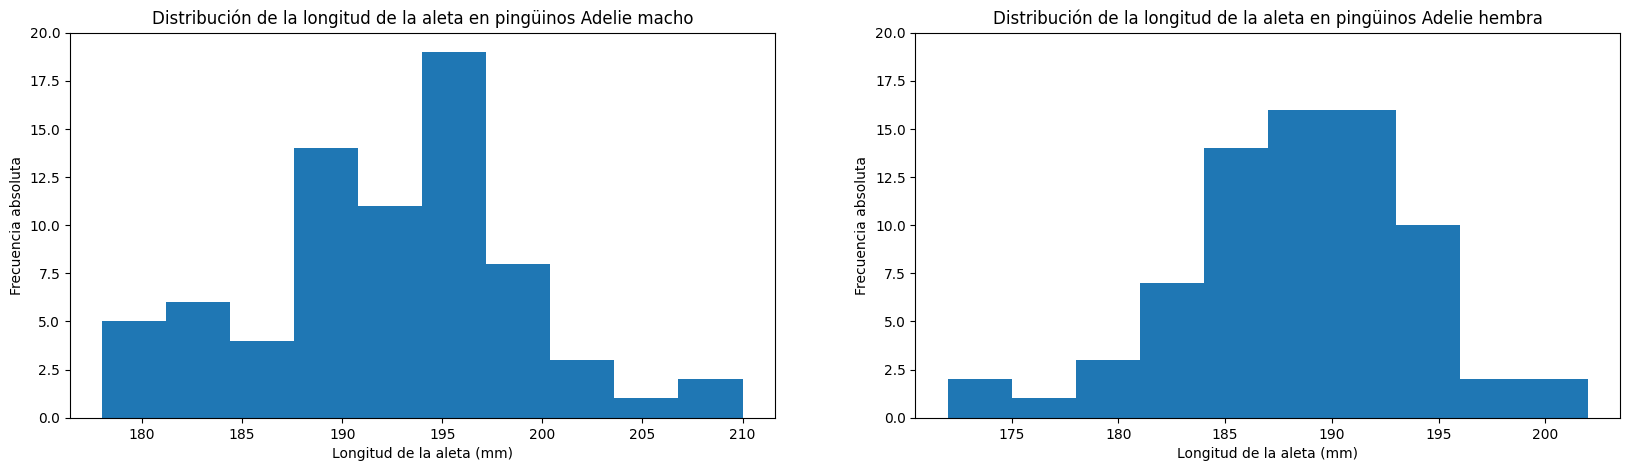

In [24]:
df20a = df[~(df["sex"].isna())]   #Filtro.
df20b = df20a[~(df20a["flipper_length_mm"].isna())]
df20 = df20b[df20b["species"]=='Adelie']
df20M = df20[df20.sex=='Male'].flipper_length_mm
df20F = df20[df20.sex=='Female'].flipper_length_mm

fig, ax = plt.subplots(ncols=2,figsize = (20,5))

ax[0].hist(df20M)
ax[0].set_title("Distribución de la longitud de la aleta en pingüinos Adelie macho") 
ax[0].set_ylim(0,20)
ax[0].set_ylabel("Frecuencia absoluta")    
ax[0].set_xlabel("Longitud de la aleta (mm)")

ax[1].hist(df20F)
ax[1].set_title("Distribución de la longitud de la aleta en pingüinos Adelie hembra") 
ax[1].set_ylim(0,20)
ax[1].set_ylabel("Frecuencia absoluta")    
ax[1].set_xlabel("Longitud de la aleta (mm)")

print("Longitud promedio de la aleta de los pingüinos Adelie macho (mm): {}".format(df20M.mean()))
print("Longitud promedio de la aleta de los pingüinos Adelie hembra (mm): {}".format(df20F.mean()))

A partir de los dos gráficos anteriores se intuye que el comportamiento de los datos sigue una distribución normal para ambos sexos. Partiendo de esta suposición se puede concluir al comparar los dos histogramas que la media de la longitud de la aleta de los pingüinos Adelie macho es mayor que la de las hembras. Dicho de otro modo, los machos Adelie tienen aletas más grandes que las hembras de la misma especie. Esto sugiere un dimorfismo sexual en el cual se podría tener que los machos Adelie son proporcionalmente más grandes que las hembras Adelie. 